### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 7938</pre>

In [1]:
# student 1: Israel 7938
# student 2: Eran 6215
# student 3: Avihai 2474
# student 4: Almog 8269
# student 5: Liron 5068
# student 6: Matan ####

## Part 2 - Experiments
You could add as many code cells as needed

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df_train = pd.read_csv('titanic_train.csv')

In [4]:
#Men
survivedMan = df_train[(df_train['Sex'] == 1) & (df_train['Age'] > 18) & (df_train['Survived'] == 1)]
survivedManCount = len(survivedMan)
print("Survived man :",survivedManCount)

#Women
survivedWomen = df_train[(df_train['Sex'] == 0) & (df_train['Age'] > 18) & (df_train['Survived'] == 1)]
survivedWomenCount = len(survivedWomen)
print("survived women:",survivedWomenCount)
#Kids
survivedKids = df_train[(df_train['Age'] <= 18) & (df_train['Survived'] == 1)]
survivedKidsCount = len(survivedKids)
print("survived kids",survivedKidsCount)

survivedCount = len(df_train[df_train['Survived'] == 1])
print("survivels: ",survivedCount)

Survived man : 69
survived women: 156
survived kids 56
survivels:  281


In [5]:
df_train.isnull().sum() 

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

## Visualization

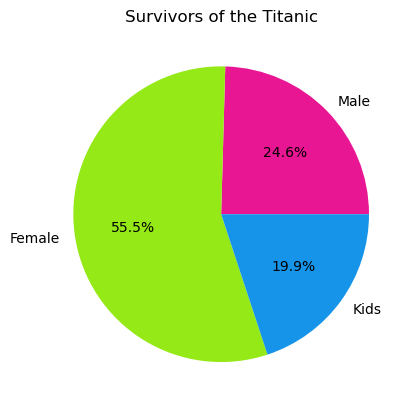

In [6]:
population = [survivedManCount,survivedWomenCount,survivedKidsCount]
labels = ['Male', 'Female','Kids']
colors = ['#E91694', '#94E916', '#1694E9']
fig,ax = plt.subplots()
ax.pie(population,labels = labels,autopct='%1.1f%%',colors=colors)
plt.title('Survivors of the Titanic')
plt.show()

C:\Users\Shlomo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shlomo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shlomo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shlomo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

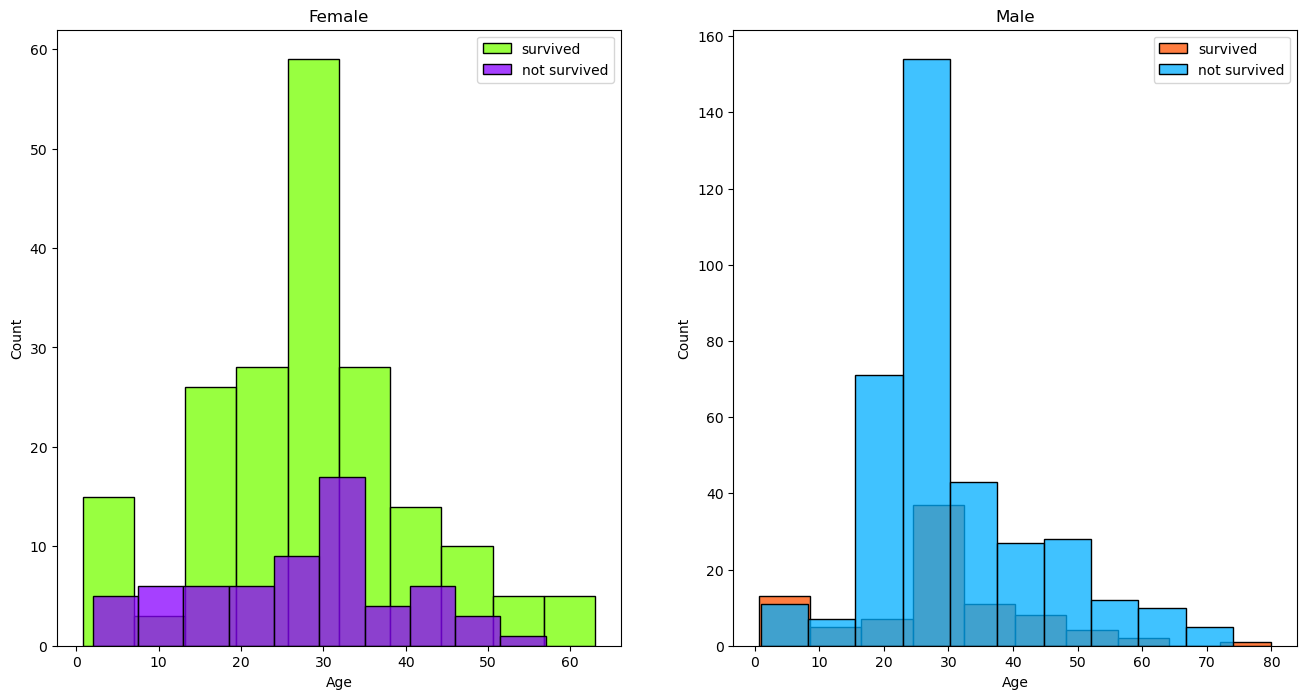

In [7]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = df_train[df_train['Sex']==0]
men = df_train[df_train['Sex']==1]
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[0], kde =False, color="#76FF00")
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[0], kde =False, color="#8900FF")
ax.legend()
ax.set_title('Female')#FFFFFF
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[1], kde = False, color="#FF5100")
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[1], kde = False, color="#00AEFF")
ax.legend()
_ = ax.set_title('Male');

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [8]:
train_set = pd.read_csv("titanic_train.csv")
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [9]:
def min_max_scale(series, feature_range=(1, -1)):
    min_val = series.min()
    max_val = series.max()
    scale = (feature_range[1] - feature_range[0]) / (max_val - min_val)
    scaled_series = scale * (series - min_val) + feature_range[0]
    return scaled_series

In [10]:
x_train = train_set[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_train = train_set['Survived']

In [13]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

## Part 4 - Apply on test and show model performance estimation

In [15]:
test_set = pd.read_csv("titanic_test.csv")

In [16]:
x_test = test_set[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_test = test_set['Survived']

In [17]:
y_predict = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
print("accuracy: ", accuracy)

accuracy:  0.7374301675977654


In [20]:
neighbors = np.arange(1, 100)
accuracy_scores=[]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

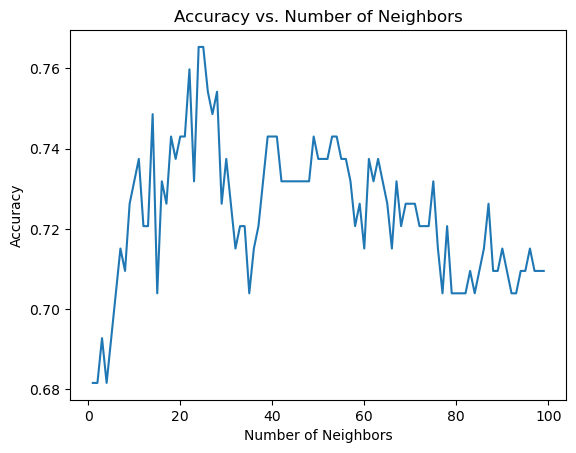

In [21]:
plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()